In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [5]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [24]:
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=2, 
           activation=tf.keras.activations.relu)(i)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=2, 
           activation=tf.keras.activations.relu)(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=2, 
           activation=tf.keras.activations.relu)(x)
x = Flatten()(x)
x = Dropout(rate=0.2)(x)
x = Dense(units=1028, activation=tf.keras.activations.relu)(x)
x = Dropout(rate=0.2)(x)
x = Dense(units=K, activation=tf.keras.activations.softmax)(x)

model = Model(inputs=[i], outputs=[x])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=["accuracy"])

In [26]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 1152)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1028)              1185

In [27]:
r = model.fit(x=x_train, y=y_train, 
              epochs=15, validation_data=(x_test, y_test), 
              use_multiprocessing=True)

Epoch 1/15
1563/1563 [==============================] - 6s 3ms/step - loss: 1.7339 - accuracy: 0.3598 - val_loss: 1.2680 - val_accuracy: 0.5379
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2383 - accuracy: 0.5556 - val_loss: 1.1211 - val_accuracy: 0.6036
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0676 - accuracy: 0.6199 - val_loss: 1.0037 - val_accuracy: 0.6448
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9220 - accuracy: 0.6759 - val_loss: 0.9518 - val_accuracy: 0.6646
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8109 - accuracy: 0.7137 - val_loss: 0.9190 - val_accuracy: 0.6749
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7221 - accuracy: 0.7428 - val_loss: 0.9117 - val_accuracy: 0.6879
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6384 - accuracy: 0.7744 - val_loss: 0.9038 - val_accuracy:

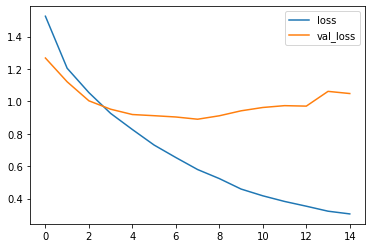

In [28]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

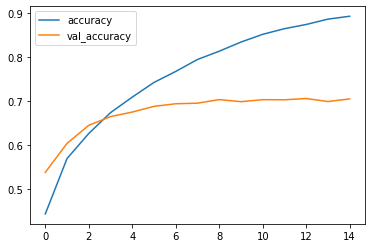

In [29]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

Confusion matrix, without normalization
[[778  20  32  14  25   5  17  12  66  31]
 [ 23 810   5  19   2   8  10   2  27  94]
 [ 67   5 544  80 105  79  74  23  17   6]
 [ 21   2  54 495  65 223  83  28  14  15]
 [ 18   8  60  78 652  42  84  48   9   1]
 [ 11   4  30 164  52 665  35  29   3   7]
 [  5   1  26  67  22  32 831   2   8   6]
 [ 21   3  24  45  76  93  16 703   8  11]
 [ 71  26  10  23  14   8  11   2 813  22]
 [ 45  77   6  37   3  12  16  16  31 757]]


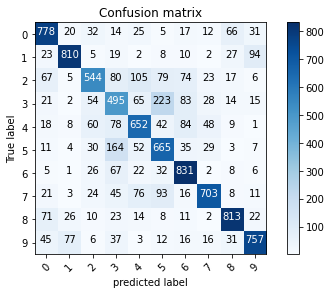

In [30]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title="Confusion matrix", 
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

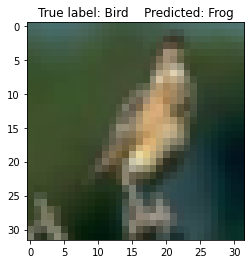

In [47]:
labels = """Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Shipo
Truck""".split()

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s    Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()